Found 32030 images belonging to 37 classes.
Found 1110 images belonging to 37 classes.


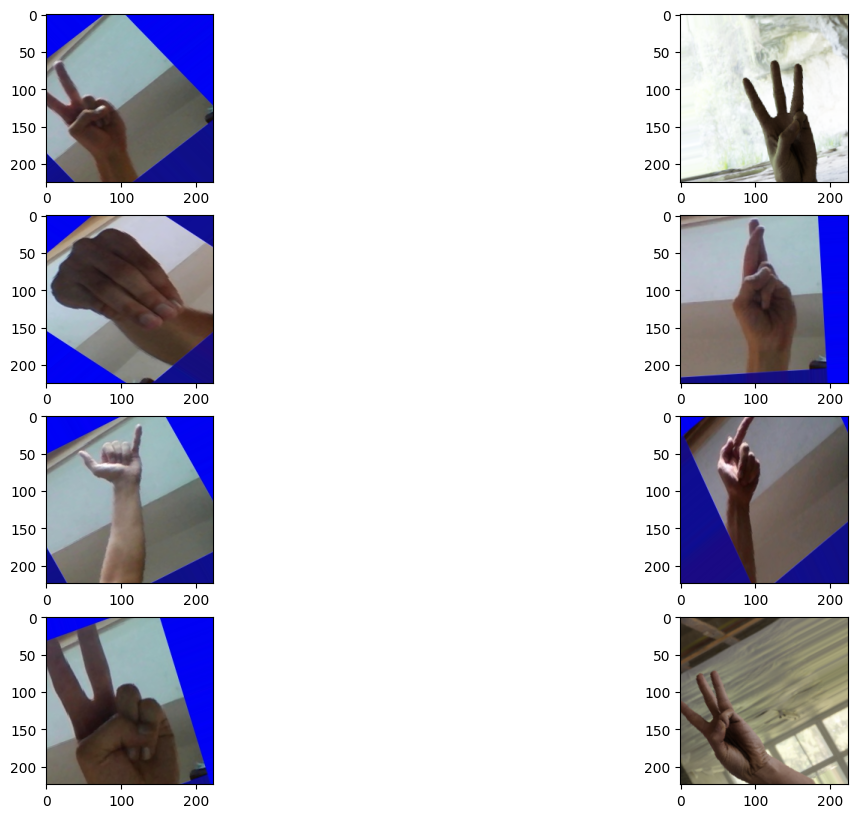


 Model summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 37)                37074     
                                                                 
 activation (Activation)     (None, 37)                0         
                                                                 
Total params: 3577339 (13.65 MB)
Trainable params: 37074 (144.82 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________
None

 Model Training: 
Epoch 1/5
1001/1001 [==============================] - 2623s 3s/step - loss: 0.6533 - accuracy: 0.8036
Epoch 2/5
1001/1001 [==============================] - 1374s 1s/step - loss: 0.3318 - accuracy: 0.8911
Epoch 3/5
1001/1001 [=======

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
img_size = 224
batch_size = 32
epochs = 5
train_path = r'E:\xampp\htdocs\sign\train'
test_path = r'E:\xampp\htdocs\sign\test'
augment_train_data = ImageDataGenerator(horizontal_flip=True,
                                        rotation_range=50,
                                        zoom_range=0.2,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        rescale=1./255,
                                        validation_split=0.1)

augment_test_data = ImageDataGenerator(rescale=1./255)
train_dataset = augment_train_data.flow_from_directory(train_path,
                                                       shuffle=True,
                                                       classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                                                                'L', 'M', 'N',
                                                                'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y',
                                                                'Z', 'space',
                                                                '0','1','2','3','4','5','6','7','8','9'],
                                                       target_size=(
                                                           img_size, img_size),
                                                       batch_size=batch_size)
train_dataset
test_dataset = augment_train_data.flow_from_directory(test_path,
                                                      classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                                                               'L', 'M', 'N',
                                                               'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y',
                                                               'Z', 'space', '0','1','2','3','4','5','6','7','8','9'],
                                                      target_size=(
                                                          img_size, img_size),
                                                      batch_size=batch_size)
test_dataset
fig = plt.figure(figsize=(15, 10))
for i in range(1,9):
    plt.subplot(4,2,i)
    plt.imshow(train_dataset[0][0][i-1])
plt.show()
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

download_model = hub.KerasLayer(url,input_shape=(img_size,img_size,3))

model = Sequential([
    download_model,
    Dense(37),
    Activation("softmax")
])
model
model.compile(optimizer=Adam(1e-3),
              loss="categorical_crossentropy",
              metrics=['accuracy'])
print("\n Model summary: ")
print(model.summary())
print("\n Model Training: ")
model.fit(train_dataset,batch_size=batch_size,epochs=epochs)
print("\n Model Evaluation: ")

In [2]:
model.evaluate(test_dataset)
model.save("asl_model.h5") 

35/35 [==============================] - 86s 2s/step - loss: 8.9721 - accuracy: 0.2541


C:\Users\SANJIDA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
